In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and Summarize

In [2]:
df_vision = pd.read_pickle("../../../data/human_data/inference/df_vision.xz")
df_audio = pd.read_pickle("../../../data/human_data/inference/df_audio.xz")
df_occluded = pd.read_pickle("../../../data/human_data/inference/df_occluded.xz")

In [3]:
def summarize_full_data(df):
    df_summary = df.groupby(['participant', 'trial']).agg(
        order=('order', 'first'),
        response=('response', 'first'),
        rt=('t', 'last'),
        experiment=('experiment', 'first')
    ).reset_index()
    return df_summary

In [4]:
df_vision_summary = summarize_full_data(df_vision)
df_audio_summary = summarize_full_data(df_audio)
df_occluded_summary = summarize_full_data(df_occluded)

In [5]:
df_vision_summary.to_csv("../../../data/human_data/inference/vision_judgment_rt.csv")
df_audio_summary.to_csv("../../../data/human_data/inference/audio_judgment_rt.csv")
df_occluded_summary.to_csv("../../../data/human_data/inference/occluded_judgment_rt.csv")

# Visualize RT Distribution

### No Sound + Ball Visible

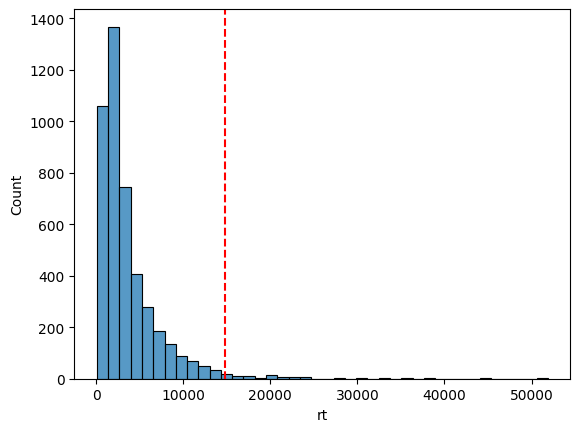

In [6]:
rt_mean = df_vision_summary["rt"].mean()
rt_std = df_vision_summary["rt"].std()
vision_cutoff = rt_mean + 3*rt_std

sns.histplot(data=df_vision_summary, x="rt", bins=40)
plt.axvline(vision_cutoff, color="red", linestyle="--")

### Sound + Ball Visible

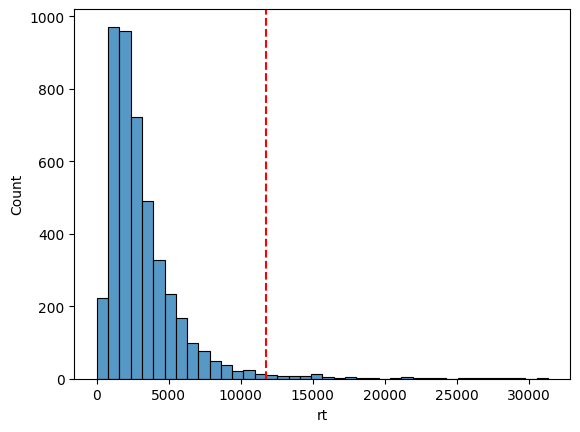

In [7]:
rt_mean = df_audio_summary["rt"].mean()
rt_std = df_audio_summary["rt"].std()
audio_cutoff = rt_mean + 3*rt_std

sns.histplot(data=df_audio_summary, x="rt", bins=40)
plt.axvline(audio_cutoff, color="red", linestyle="--")

### Sound + Ball Occluded

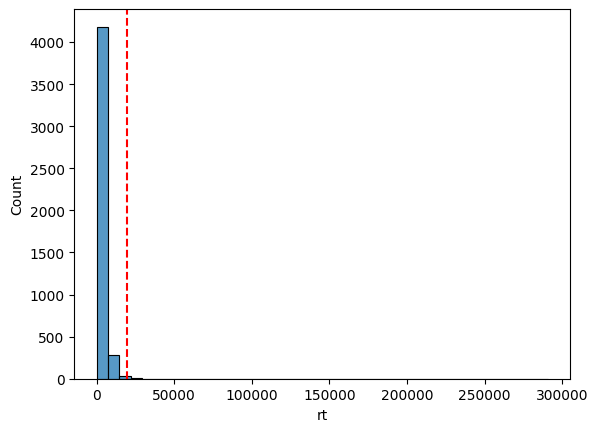

In [8]:
rt_mean = df_occluded_summary["rt"].mean()
rt_std = df_occluded_summary["rt"].std()
occluded_cutoff = rt_mean + 3*rt_std

sns.histplot(data=df_occluded_summary, x="rt", bins=40)
plt.axvline(occluded_cutoff, color="red", linestyle="--")

# Clean Summary Files

In [9]:
df_vision_summary_rt_cleaned = df_vision_summary[df_vision_summary["rt"] <= vision_cutoff]
df_audio_summary_rt_cleaned = df_audio_summary[df_audio_summary["rt"] <= audio_cutoff]
df_occluded_summary_rt_cleaned = df_occluded_summary[df_occluded_summary["rt"] <= occluded_cutoff]

In [10]:
df_vision_summary_rt_cleaned.to_csv("../../../data/human_data/inference/vision_judgment_rt_cleaned.csv")
df_audio_summary_rt_cleaned.to_csv("../../../data/human_data/inference/audio_judgment_rt_cleaned.csv")
df_occluded_summary_rt_cleaned.to_csv("../../../data/human_data/inference/occluded_judgment_rt_cleaned.csv")

# Clean Full Data Files

In [11]:
def clean_outliers(df_data, df_summary, condition):

    df_full = df_data.copy()

    rt_mean = df_summary["rt"].mean()
    rt_std = df_summary["rt"].std()
    cutoff = rt_mean + 3*rt_std

    df_exclude = df_summary[df_summary["rt"] > cutoff]

    exclude_trials = list(zip(df_exclude["participant"], df_exclude["trial"]))

    df_full["part_trial"] = list(zip(df_full["participant"], df_full["trial"]))
    df_full = df_full[~df_full["part_trial"].isin(exclude_trials)]

    df_full = df_full.drop(columns=["part_trial"])

    df_full.to_pickle(f"../../../data/human_data/inference/df_{condition}_rt_cleaned.xz")

    return df_full, df_exclude

In [12]:
df_vision_cleaned, df_vision_outliers = clean_outliers(df_vision, df_vision_summary, "vision")

In [35]:
df_vision_outliers

,participant,trial,order,response,rt,experiment
192,2,43,71,2,16173.569202,vision
215,2,66,98,2,15803.080082,vision
359,3,60,90,3,20331.938028,vision
383,3,85,24,1,19905.267954,vision
389,3,97,88,1,23539.516926,vision
...,...,...,...,...,...,...
4180,28,190,67,3,15007.239103,vision
4197,28,326,15,3,16644.685030,vision
4366,30,17,100,2,16477.130890,vision
4371,30,22,52,1,16924.546003,vision


In [36]:
df_audio_cleaned, df_audio_outliers = clean_outliers(df_audio, df_audio_summary, "audio")

In [37]:
df_audio_outliers

,participant,trial,order,response,rt,experiment
24,2,25,36,1,18842.326164,vision_sound
34,2,35,21,3,18081.243038,vision_sound
53,2,54,43,2,16109.137058,vision_sound
56,2,57,1,3,25298.922062,vision_sound
65,2,66,58,2,13499.722004,vision_sound
...,...,...,...,...,...,...
4432,31,84,113,1,15404.582024,vision_sound
4446,31,107,51,1,23576.329947,vision_sound
4453,31,118,15,3,12344.457865,vision_sound
4490,31,289,8,1,21961.905956,vision_sound


In [38]:
df_occluded_cleaned, df_occluded_outliers = clean_outliers(df_occluded, df_occluded_summary, "occluded")

In [39]:
df_occluded_outliers

,participant,trial,order,response,rt,experiment
319,3,20,6,1,32078.050852,occluded
341,3,42,7,1,43442.506075,occluded
351,3,52,12,3,23181.046963,occluded
411,3,133,29,1,26470.810175,occluded
3171,22,22,56,3,19636.267900,occluded
3184,22,35,34,1,20262.313128,occluded
3191,22,42,36,3,19566.697121,occluded
3193,22,44,73,2,20335.850954,occluded
3196,22,47,18,3,19688.174009,occluded
3209,22,60,23,3,21350.646973,occluded
